## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
research_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID","Mouse ID"])
# Display the data table for preview
research_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
research_complete["Mouse ID"].count()

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_data = research_complete.duplicated(subset=['Mouse ID', 'Timepoint'],keep=False)
duplicated_data = duplicated_data[duplicated_data == True].to_frame()  # Find true values
index_list = duplicated_data.index[duplicated_data[0] == True].tolist()
duplicated_data.rename(columns={0: "Duplicated"})

,Duplicated
908,True
909,True
910,True
911,True
912,True
913,True
914,True
915,True
916,True
917,True


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
research_complete.loc[index_list]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
no_duplicates_df = research_complete.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
no_duplicates_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
no_duplicates_df["Mouse ID"].count()

1888

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean_summary = no_duplicates_df.groupby(['Drug Regimen']).mean()
mean_summary = mean_summary.loc[:,'Tumor Volume (mm3)'].to_frame()  # Extract Tumor volume column
mean_summary = mean_summary.rename(columns={"Tumor Volume (mm3)": "Mean of Tumor Volume (mm3)"})

median_summary = no_duplicates_df.groupby(['Drug Regimen']).median()
median_summary = median_summary.loc[:,'Tumor Volume (mm3)'].to_frame()
median_summary = median_summary.rename(columns={"Tumor Volume (mm3)": "Median of Tumor Volume (mm3)"})

variance_summary = no_duplicates_df.groupby(['Drug Regimen']).var()
variance_summary = variance_summary.loc[:,'Tumor Volume (mm3)'].to_frame()
variance_summary = variance_summary.rename(columns={"Tumor Volume (mm3)": "Variance of Tumor Volume (mm3)"})

sdev_summary = no_duplicates_df.groupby(['Drug Regimen']).std() 
sdev_summary = sdev_summary.loc[:,'Tumor Volume (mm3)'].to_frame()
sdev_summary = sdev_summary.rename(columns={"Tumor Volume (mm3)": "Standard Deviation of Tumor Volume (mm3)"})

sem_summary = no_duplicates_df.groupby(['Drug Regimen']).sem()
sem_summary = sem_summary.loc[:,'Tumor Volume (mm3)'].to_frame() 
sem_summary = sem_summary.rename(columns={"Tumor Volume (mm3)": "Standard Error of the Mean of Tumor Volume (mm3)"})

summary_stats = pd.concat([mean_summary, median_summary, variance_summary, sdev_summary, sem_summary], axis=1)
summary_stats


,Mean of Tumor Volume (mm3),Median of Tumor Volume (mm3),Variance of Tumor Volume (mm3),Standard Deviation of Tumor Volume (mm3),Standard Error of the Mean of Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_df = no_duplicates_df.groupby(['Drug Regimen']).agg(['mean','median','var','std','sem']).loc[:,'Tumor Volume (mm3)']
agg_df.rename(columns={"mean": "Mean of Tumor Volume (mm3)","median": "Median of Tumor Volume (mm3)","var": "Variance of Tumor Volume (mm3)","std": "Standard Deviation of Tumor Volume (mm3)","sem": "Standard Error of the Mean of Tumor Volume (mm3)"})

,Mean of Tumor Volume (mm3),Median of Tumor Volume (mm3),Variance of Tumor Volume (mm3),Standard Deviation of Tumor Volume (mm3),Standard Error of the Mean of Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

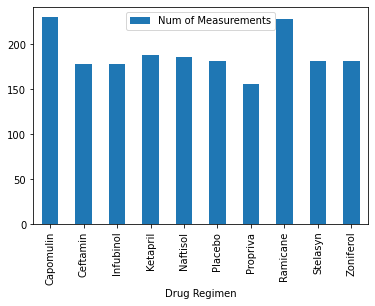

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
bar_plot = no_duplicates_df.groupby('Drug Regimen').count().loc[:,'Mouse ID'].to_frame().rename(columns={"Mouse ID": "Num of Measurements"})
plot = bar_plot.plot.bar()

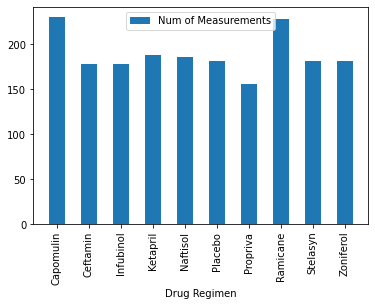

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(bar_plot["Num of Measurements"].count()) # bars positioning
pltplot = bar_plot.loc[:,'Num of Measurements'] # bars values
labels = bar_plot.index # bars labels

plt.bar(x_axis,pltplot, width=0.5)
plt.xticks(x_axis, labels, rotation='vertical')
plt.legend(['Num of Measurements'],loc='upper center')
plt.xlabel("Drug Regimen")
plt.autoscale()

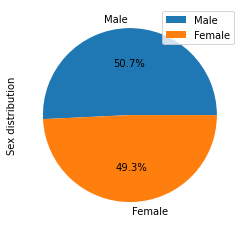

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_plot = no_duplicates_df.loc[:,'Sex']
pie_plot_male = pie_plot[pie_plot == 'Male'].count()
pie_plot_female = pie_plot[pie_plot == 'Female'].count()

pie_plot_df = pd.DataFrame(
    
                {"Sex distribution": [pie_plot_male, pie_plot_female]},
    
                index=['Male','Female']
)

#pie_plot_df
plot1 = pie_plot_df.plot.pie(y='Sex distribution', autopct='%1.1f%%')

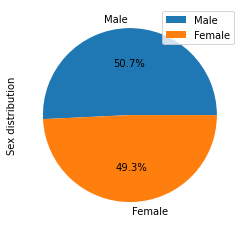

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
 
plt.pie([pie_plot_male,pie_plot_female], labels=['Male','Female'], autopct='%1.1f%%')
plt.ylabel("Sex distribution")
plt.legend()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Display 10 rows from DataFrame
pd.set_option('display.max_rows', 10)

# Start by getting the last (greatest) timepoint for each mouse
# Find each unique mouse
list_of_ID = list(no_duplicates_df["Mouse ID"].unique())

mouse_last_timepoint = pd.DataFrame()

for i in range(len(list_of_ID)):
    mouse_last_timepoint = pd.concat([mouse_last_timepoint, no_duplicates_df.loc[no_duplicates_df["Mouse ID"] == list_of_ID[i]].iloc[-1].to_frame().T])
    
mouse_last_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.0501,1
19,s185,Capomulin,Female,3,17,45,23.3436,1
29,x401,Capomulin,Female,16,15,45,28.484,0
39,m601,Capomulin,Male,22,17,45,28.431,1
49,g791,Ramicane,Male,11,16,45,29.1285,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.9347,0
1862,z435,Propriva,Female,12,26,10,48.7107,0
1872,z581,Infubinol,Female,24,25,45,62.7545,3
1882,z795,Naftisol,Female,13,29,45,65.7411,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Ramicane','Capomulin','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []

final_volume = pd.DataFrame()
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_volume = mouse_last_timepoint.loc[mouse_last_timepoint["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_volume_list.append(final_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_volume.loc[(final_volume < lower_bound) | (final_volume > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")
    

Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: object)
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: object)
Infubinol's potential outliers: 669    36.3213
Name: Tumor Volume (mm3), dtype: object
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: object)


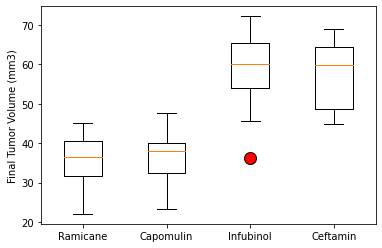

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot(tumor_volume_list, labels = treatments,flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

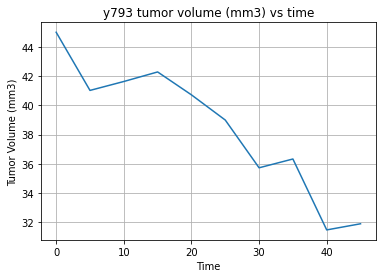

In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_plot = no_duplicates_df.loc[no_duplicates_df["Drug Regimen"] == "Capomulin"]
capomulin_mouse_id = list(mouse_plot["Mouse ID"].unique())
mouse_plot_line = mouse_plot.loc[mouse_plot["Mouse ID"] == capomulin_mouse_id[5]]

plt.plot(mouse_plot_line["Timepoint"],mouse_plot_line["Tumor Volume (mm3)"])                      
plt.title(capomulin_mouse_id[5] + " tumor volume (mm3) vs time")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time")
plt.grid()

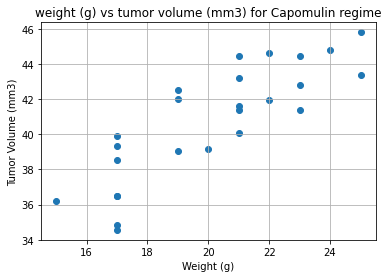

In [28]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_plot_average = mouse_plot.groupby(["Mouse ID"]).mean()
plt.scatter(mouse_plot_average["Weight (g)"],mouse_plot_average["Tumor Volume (mm3)"])
plt.title("weight (g) vs tumor volume (mm3) for Capomulin regime")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.grid()

## Correlation and Regression

The correlation between mouse weight and average is: 0.84


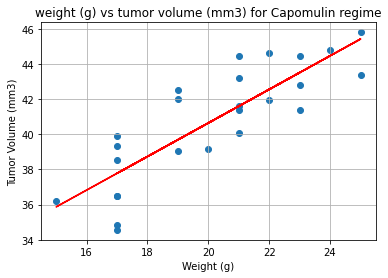

In [39]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(mouse_plot_average["Weight (g)"],mouse_plot_average["Tumor Volume (mm3)"])[0],2)
print("The correlation between mouse weight and average is: " + str(correlation))
regression = st.linregress(mouse_plot_average["Weight (g)"],mouse_plot_average["Tumor Volume (mm3)"])
y_eq = regression[0]*mouse_plot_average["Weight (g)"] + regression[1]

# Scatter plot and regression line
plt.plot(mouse_plot_average["Weight (g)"],y_eq,color="red")
plt.scatter(mouse_plot_average["Weight (g)"],mouse_plot_average["Tumor Volume (mm3)"])
plt.title("weight (g) vs tumor volume (mm3) for Capomulin regime")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.grid()